# Trp-cage

In [4]:
import pyemma
import numpy as np
from glob import glob

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

## Read data

In [4]:
pdb_file = '/Volumes/Seagate55/work/DESRES/trpcage/protein.pdb'
traj_files = sorted(glob('/Volumes/Seagate55/work/DESRES/trpcage/*.dcd'))

## Featurize with inter-residue distances

In [10]:
features = pyemma.coordinates.featurizer(pdb_file)
features.add_residue_mindist()

X = pyemma.coordinates.load([traj_files], features)

## tICA and k-means clustering using top-scoring model hyperparameters

### top model is: commute tICA mapping, 10 ns (50 frames) tICA lag time, 100 tICs, 50 microstates

In [11]:
tica = pyemma.coordinates.tica(X, lag=50, dim=100, kinetic_map=False, commute_map=True)
Y = tica.get_output()

In [12]:
kmeans = pyemma.coordinates.cluster_kmeans(Y, k=50, max_iter=100)
dtrajs = kmeans.dtrajs

In [3]:
np.save('trpcage_dtrajs.npy', dtrajs)
#dtrajs = list(np.load('trpcage_dtrajs.npy'))

### In this notebook analyzing only maximum likelihood models for quick re-running. Analysis including errors with Bayesian MSMs, and choice of final lag time, is in the all_top_models_timescales.ipynb notebook.

## Timescales

In [6]:
its = pyemma.msm.its(dtrajs, 2000, errors='bayes')

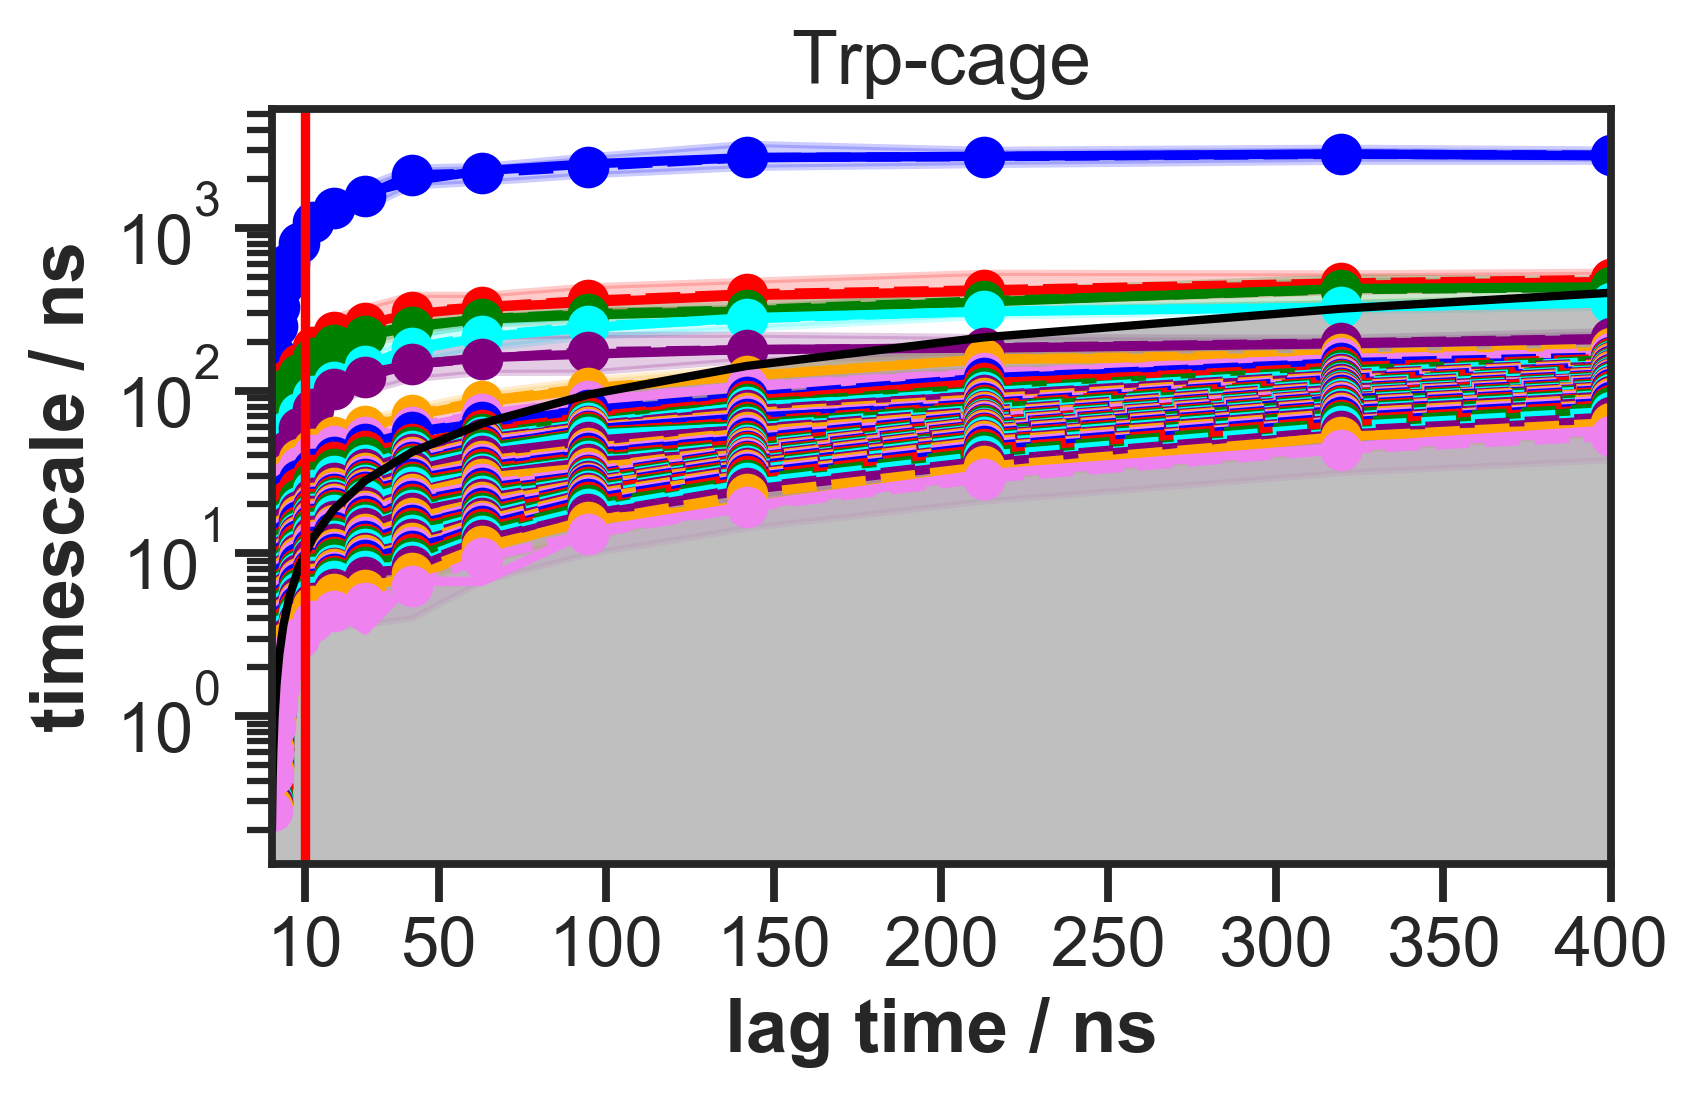

In [10]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its, ylog=True, dt=0.2, units='ns')
plt.axvline(10, c='red')
plt.title('Trp-cage')
plt.xticks([10,50,100,150,200,250,300,350,400])
plt.xlabel('lag time / ns', weight='bold')
plt.ylabel('timescale / ns', weight='bold')
plt.tight_layout()
plt.savefig('trpcage_its_log.png', dpi=300)
plt.savefig('trpcage_its_log.pdf')

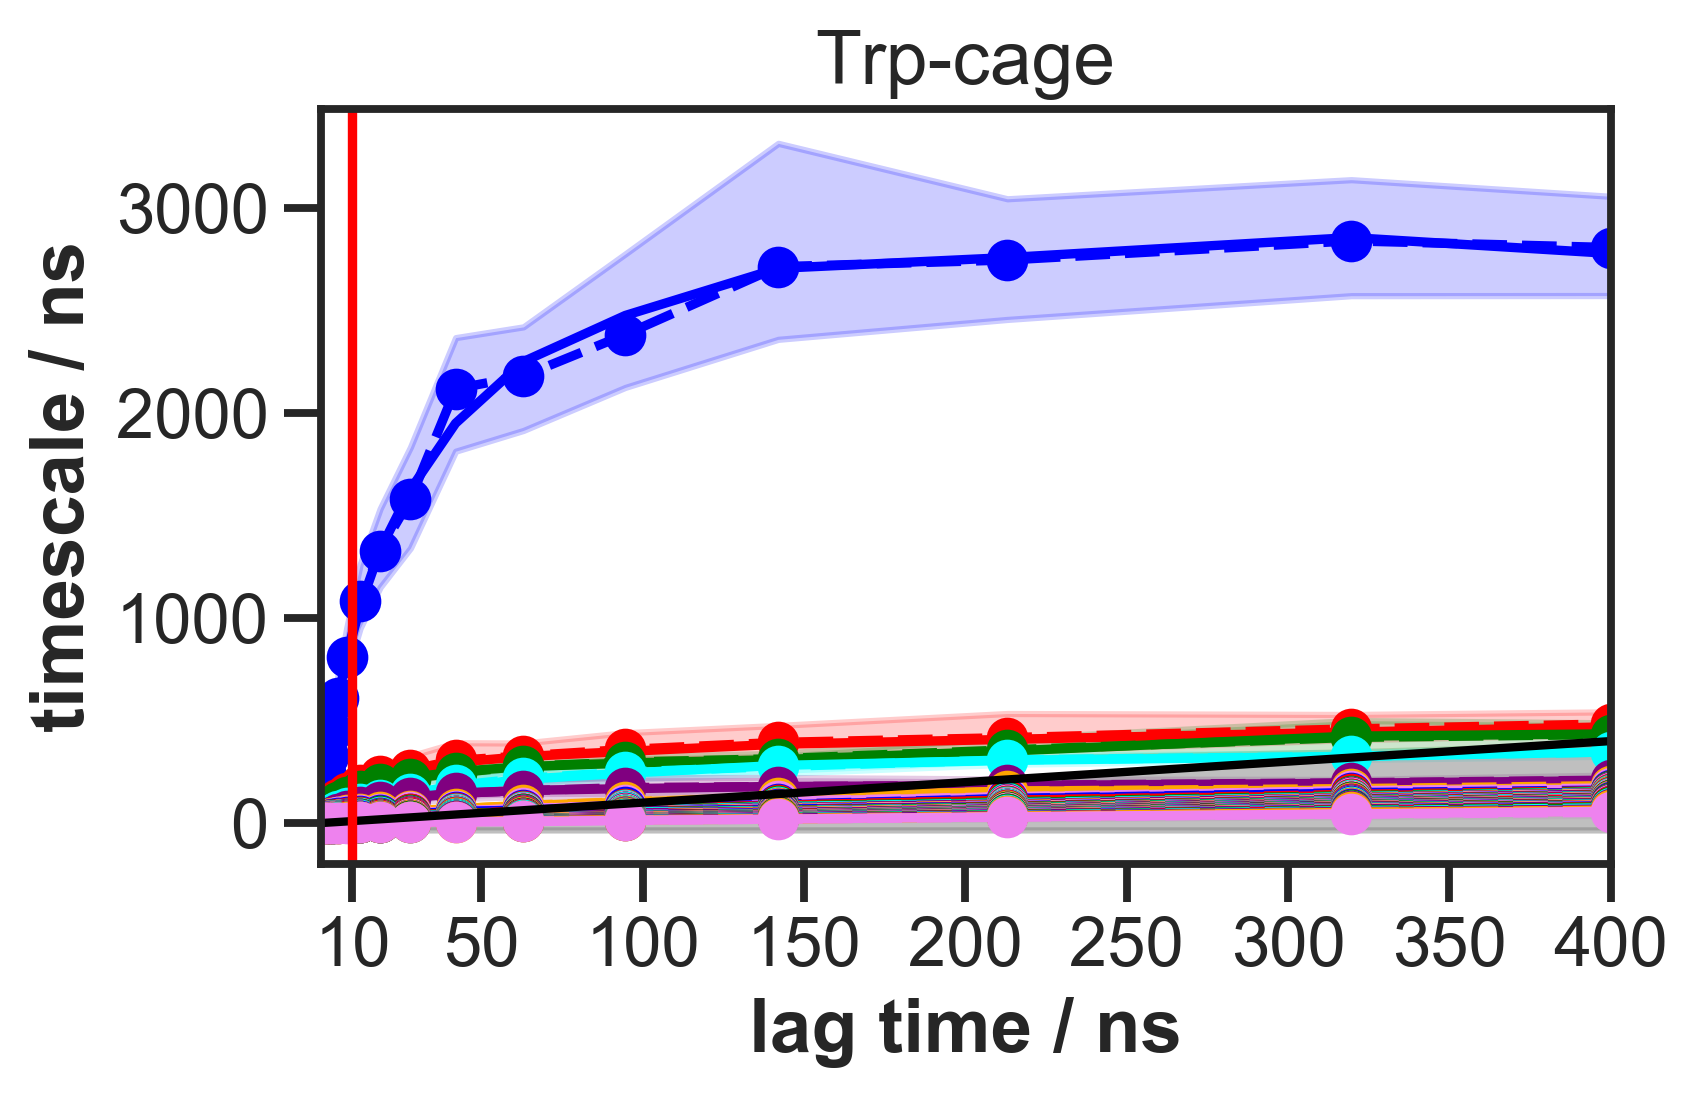

In [11]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its, ylog=False, dt=0.2, units='ns')
plt.axvline(10, c='red')
plt.title('Trp-cage')
plt.xticks([10,50,100,150,200,250,300,350,400])
plt.xlabel('lag time / ns', weight='bold')
plt.ylabel('timescale / ns', weight='bold')
plt.tight_layout()
plt.savefig('trpcage_its_lin.png', dpi=300)
plt.savefig('trpcage_its_lin.pdf')

## CK test

### lag 10 ns

In [12]:
msm = pyemma.msm.bayesian_markov_model(dtrajs, 10*5)
ck_test = msm.cktest(2, mlags=(np.arange(10) * 2000/10).astype('int'))

<Figure size 432x288 with 0 Axes>

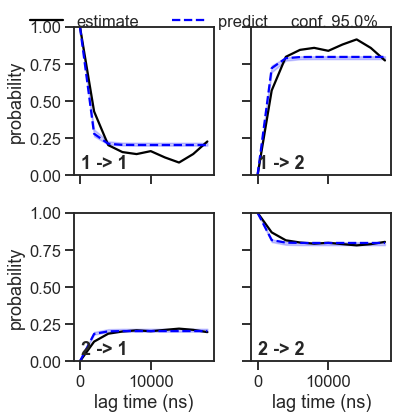

In [13]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('trpcage_cktest_lag10ns.png', dpi=300)
plt.savefig('trpcage_cktest_lag10ns.pdf')

In [20]:
msm = pyemma.msm.bayesian_markov_model(dtrajs, 10*5)
ck_test = msm.cktest(2, mlags=(np.arange(10) * 200/10).astype('int'))

<Figure size 432x288 with 0 Axes>

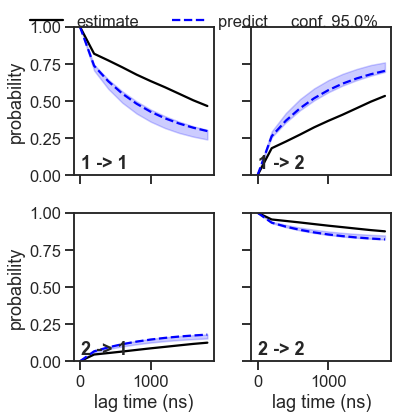

In [21]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('trpcage_cktest_lag10ns_shortlags.png', dpi=300)
plt.savefig('trpcage_cktest_lag10ns_shortlags.pdf')

### lag 50 ns

In [14]:
msm = pyemma.msm.bayesian_markov_model(dtrajs, 50*5)
ck_test = msm.cktest(2, mlags=(np.arange(10) * 2000/50).astype('int'))

<Figure size 432x288 with 0 Axes>

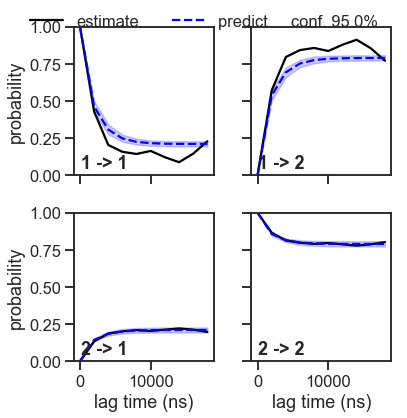

In [15]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('trpcage_cktest_lag50ns.png', dpi=300)
plt.savefig('trpcage_cktest_lag50ns.pdf')

In [22]:
msm = pyemma.msm.bayesian_markov_model(dtrajs, 50*5)
ck_test = msm.cktest(2, mlags=(np.arange(10) * 200/50).astype('int'))

<Figure size 432x288 with 0 Axes>

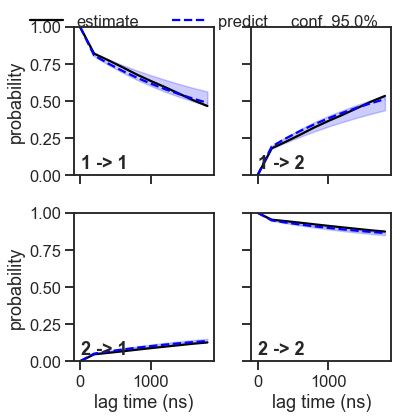

In [23]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('trpcage_cktest_lag50ns_shortlags.png', dpi=300)
plt.savefig('trpcage_cktest_lag50ns_shortlags.pdf')

### lag 100 ns

In [16]:
msm = pyemma.msm.bayesian_markov_model(dtrajs, 100*5)
ck_test = msm.cktest(2, mlags=(np.arange(10) * 2000/100).astype('int'))

<Figure size 432x288 with 0 Axes>

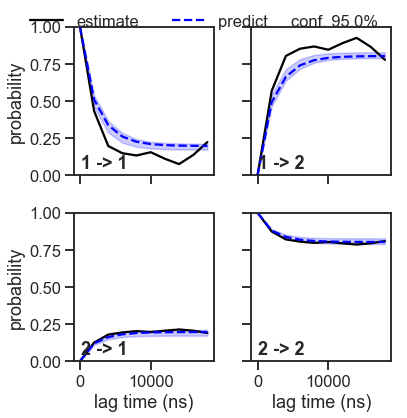

In [17]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('trpcage_cktest_lag100ns.png', dpi=300)
plt.savefig('trpcage_cktest_lag100ns.pdf')

In [24]:
msm = pyemma.msm.bayesian_markov_model(dtrajs, 100*5)
ck_test = msm.cktest(2, mlags=(np.arange(10) * 200/100).astype('int'))

<Figure size 432x288 with 0 Axes>

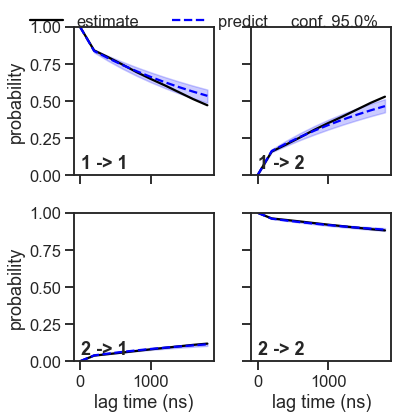

In [25]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('trpcage_cktest_lag100ns_shortlags.png', dpi=300)
plt.savefig('trpcage_cktest_lag100ns_shortlags.pdf')

### lag 150 ns

In [18]:
msm = pyemma.msm.bayesian_markov_model(dtrajs, 150*5)
ck_test = msm.cktest(2, mlags=(np.arange(10) * 2000/150).astype('int'))

<Figure size 432x288 with 0 Axes>

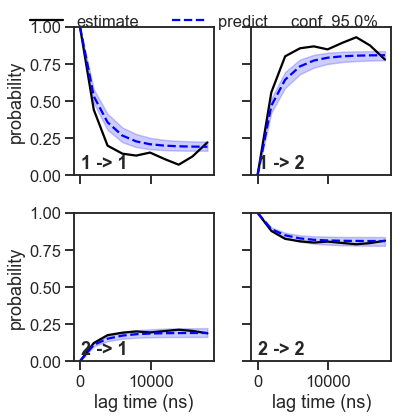

In [19]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('trpcage_cktest_lag150ns.png', dpi=300)
plt.savefig('trpcage_cktest_lag150ns.pdf')

In [26]:
msm = pyemma.msm.bayesian_markov_model(dtrajs, 150*5)
ck_test = msm.cktest(2, mlags=(np.arange(10) * 200/150).astype('int'))

<Figure size 432x288 with 0 Axes>

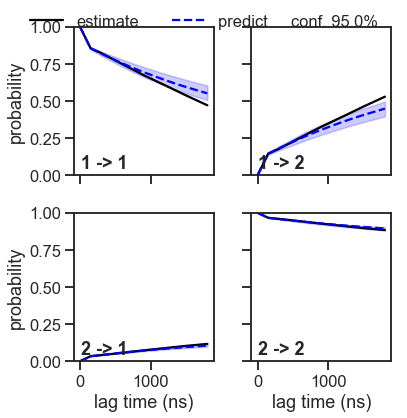

In [27]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('trpcage_cktest_lag150ns_shortlags.png', dpi=300)
plt.savefig('trpcage_cktest_lag150ns_shortlags.pdf')